In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data

,N,cap,sol_val,op,method
0,8,8,1721,111,bottom-up
1,8,8,1721,93,top-down
2,8,8,1721,108,backtracking
3,8,8,1721,19,greedy
4,8,8,1721,164,brute-force
...,...,...,...,...,...
744,26,22,2841,905,bottom-up
745,26,22,2841,1328,top-down
746,26,22,2841,3238,backtracking
747,26,22,2841,172,greedy


In [63]:
data.method.unique()

array(['bottom-up', 'top-down', 'backtracking', 'greedy', 'brute-force',
       'exhaustive-search'], dtype=object)

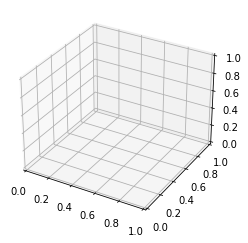

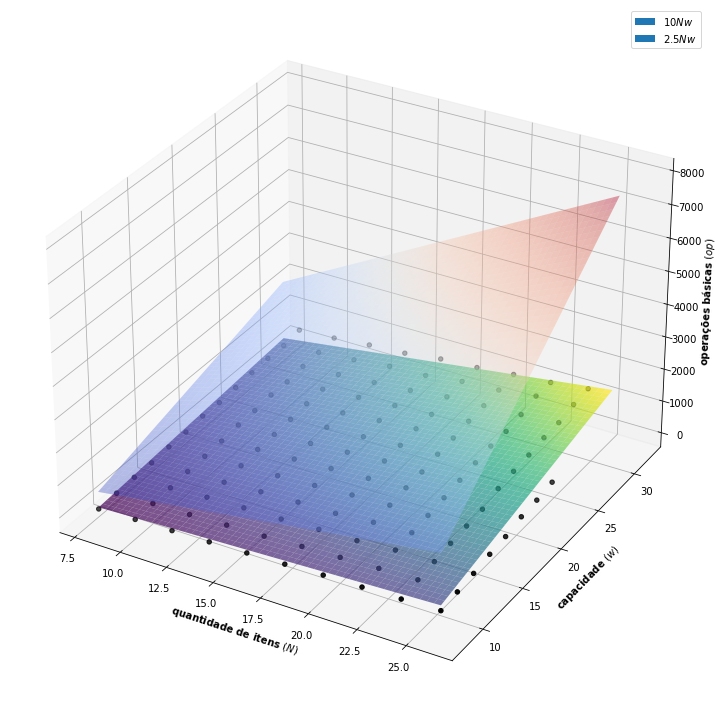

In [38]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = np.linspace(8, 26, 1000)  
y = np.linspace(8, 30, 1000)  
X, Y = np.meshgrid(x, y)
Z = 10*X*Y
W = 2.5*X*Y

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
# Plot the surface.
c1 = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.375)
t = ax.plot_surface(X, Y, W, cmap=cm.viridis, alpha=0.7)


bottom_up=data[data["method"]=="bottom-up"]
x = bottom_up["N"].values
y = bottom_up["cap"].values
z = bottom_up["op"].values

ax.scatter(x, y, z, marker='o', color="black", label="$T(n) medido")
ax.set_xlabel('quantidade de itens $(N)$', fontweight="bold")
ax.set_ylabel('capacidade $(w)$', fontweight="bold")
ax.set_zlabel('operações básicas $(op)$', fontweight="bold")

labels = ["$10Nw$", "$2.5Nw$"]
for i in range(len(labels)):
    ax.collections[i].set_label(labels[i])

point = mlines.Line2D([], [], color='black', marker='o', linestyle='None', label='$T(n) medido$')

# ax._facecolors2d = ax._facecolor3d
# ax._edgecolors2d = ax._edgecolor3d 
# print(ax._facecolor)

proxy = [plt.Rectangle((0,0),1,1, fc = pc._facecolors) for pc in ax.collections]
proxy.append(point)
plt.tight_layout()

plt.legend(proxy, labels, bbox_to_anchor=(1, 1))

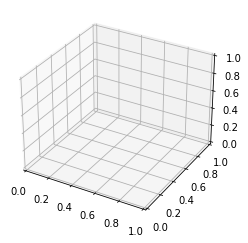

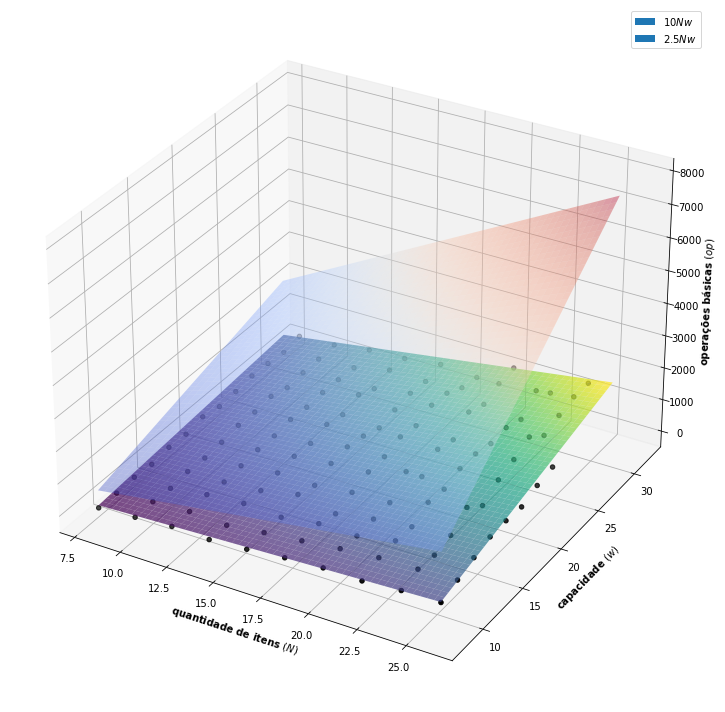

In [37]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x = np.linspace(8, 26, 1000)  
y = np.linspace(8, 30, 1000)  
X, Y = np.meshgrid(x, y)
Z = 10*X*Y
W = 2.75*X*Y

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
# Plot the surface.
c1 = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.375)
t = ax.plot_surface(X, Y, W, cmap=cm.viridis, alpha=0.7)


df=data[data["method"]=="top-down"]
x = df["N"].values
y = df["cap"].values
z = df["op"].values

ax.scatter(x, y, z, marker='o', color="black", label="$T(n) medido")
ax.set_xlabel('quantidade de itens $(N)$', fontweight="bold")
ax.set_ylabel('capacidade $(w)$', fontweight="bold")
ax.set_zlabel('operações básicas $(op)$', fontweight="bold")

labels = ["$10Nw$", "$2.5Nw$"]
for i in range(len(labels)):
    ax.collections[i].set_label(labels[i])

point = mlines.Line2D([], [], color='black', marker='o', linestyle='None', label='$T(n) medido$')

# ax._facecolors2d = ax._facecolor3d
# ax._edgecolors2d = ax._edgecolor3d 
# print(ax._facecolor)

proxy = [plt.Rectangle((0,0),1,1, fc = pc._facecolors) for pc in ax.collections]
proxy.append(point)
plt.tight_layout()

plt.legend(proxy, labels, bbox_to_anchor=(1, 1))

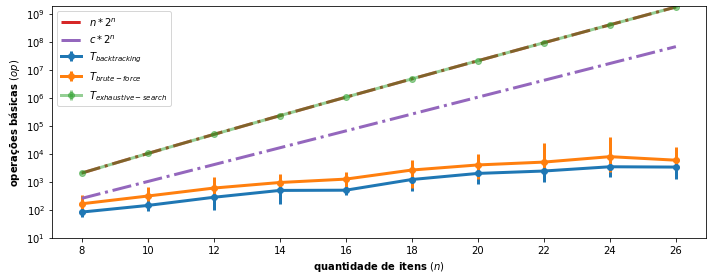

In [112]:
import matplotlib.lines as mlines
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

for name in ["backtracking", "brute-force", "exhaustive-search"]:
    df=data[data["method"]==name]
    df = df.groupby("N")["op"].agg(["min", "median", "max"])
    x = df.index
    yerr = df[["max", "min"]].copy()
    yerr["max"] -= df["median"]
    yerr["min"] -= df["median"]
    x = df.index
    z = df["median"].values
    if name=="exhaustive-search":
        plt.errorbar(x, z, yerr=(np.abs(yerr["min"]), yerr["max"]), label="$T_{"+name+"}$", marker="o", linewidth=3, alpha=0.5)
    else:
        plt.errorbar(x, z, yerr=(np.abs(yerr["min"]), yerr["max"]), label="$T_{"+name+"}$", marker="o", linewidth=3)



x = np.linspace(8, 26, 1000)  
Z = x*np.exp2(x)
W = 1*np.exp2(x)

ax.plot(x, Z, label="$n*2^n$", linewidth=3, linestyle='dashdot')
ax.plot(x, W, label="$c*2^n$", linewidth=3, linestyle='dashdot')
# z = df["op"].values
ax.set_ylim(10^0)
ax.set_xticks([x for x in range(8,28,2)])
ax.set_xticklabels([str(x) for x in range(8,28,2)])
plt.legend(loc='upper left');
ax.set_yscale("symlog")
ax.set_xlabel('quantidade de itens $(n)$', fontweight="bold")
ax.set_ylabel('operações básicas $(op)$', fontweight="bold")
plt.tight_layout()

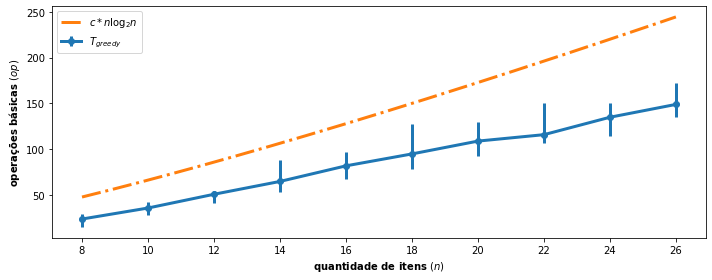

In [109]:
import matplotlib.lines as mlines
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

for name in ["greedy"]:
    df=data[data["method"]==name]
    df = df.groupby("N")["op"].agg(["min", "median", "max"])
    x = df.index
    yerr = df[["max", "min"]].copy()
    yerr["max"] -= df["median"]
    yerr["min"] -= df["median"]
    x = df.index
    z = df["median"].values
    if name=="exhaustive-search":
        plt.errorbar(x, z, yerr=(np.abs(yerr["min"]), yerr["max"]), label="$T_{"+name+"}$", marker="o", linewidth=3, alpha=0.5)
    else:
        plt.errorbar(x, z, yerr=(np.abs(yerr["min"]), yerr["max"]), label="$T_{"+name+"}$", marker="o", linewidth=3)



x = np.linspace(8, 26, 1000)  
Z = 2*x*np.log2(x)

ax.plot(x, Z, label="$c*n\log_2n$", linewidth=3, linestyle='dashdot')
# z = df["op"].values

plt.legend(loc='upper left');
# ax.set_xlim(left=8)
ax.set_xticks([x for x in range(8,28,2)])
ax.set_xticklabels([str(x) for x in range(8,28,2)])
ax.set_xlabel('quantidade de itens $(n)$', fontweight="bold")
ax.set_ylabel('operações básicas $(op)$', fontweight="bold")
plt.tight_layout()